# Accuracy

In [1]:
from __future__ import print_function
import numpy as np 

def acc(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return float(correct)/y_true.shape[0]

y_true = np.array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2])
y_pred = np.array([0, 1, 0, 2, 1, 1, 0, 2, 1, 2])
print('accuracy = ', acc(y_true, y_pred))

accuracy =  0.6


In [2]:
from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(y_true, y_pred))

accuracy =  0.6


# Confusion matrix

In [3]:
def my_confusion_matrix(y_true, y_pred):
    N = np.unique(y_true).shape[0] # number of classes 
    cm = np.zeros((N, N))
    for n in range(y_true.shape[0]):
        cm[y_true[n], y_pred[n]] += 1
    return cm 

cnf_matrix = my_confusion_matrix(y_true, y_pred)
print('Confusion matrix:')
print(cnf_matrix)
print('\nAccuracy:', np.diagonal(cnf_matrix).sum()/cnf_matrix.sum())

Confusion matrix:
[[2. 1. 1.]
 [1. 2. 0.]
 [0. 1. 2.]]

Accuracy: 0.6


In [4]:
normalized_confusion_matrix = cnf_matrix/cnf_matrix.sum(axis = 1, keepdims = True)
print('\nConfusion matrix (with normalizatrion:)')
print(normalized_confusion_matrix)


Confusion matrix (with normalizatrion:)
[[0.5        0.25       0.25      ]
 [0.33333333 0.66666667 0.        ]
 [0.         0.33333333 0.66666667]]


In [5]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion matrix:')
print(cnf_matrix)

Confusion matrix:
[[2 1 1]
 [1 2 0]
 [0 1 2]]


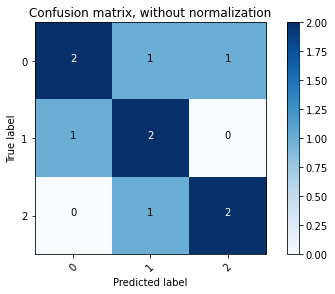

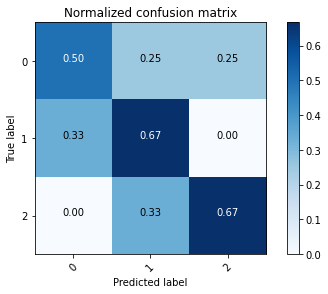

In [6]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = [0, 1, 2]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Receiver Operating Characteristic curve



In [7]:
# generate simulated data
n0, n1 = 20, 30
score0 = np.random.rand(n0)/2
label0 = np.zeros(n0, dtype = int)
score1  = np.random.rand(n1)/2 + .2
label1 = np.ones(n1, dtype = int)
scores = np.concatenate((score0, score1))
y_true = np.concatenate((label0, label1))

print('True labels:')
print(y_true)
print('\nScores:')
print(scores)

True labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]

Scores:
[0.21940803 0.45611939 0.28779149 0.14602458 0.07016477 0.10604899
 0.31442173 0.05983877 0.17299722 0.09775829 0.17191345 0.44971425
 0.09884016 0.34566543 0.40641404 0.11378586 0.31372225 0.37613451
 0.03773624 0.43231765 0.30515843 0.22338194 0.41627833 0.28016752
 0.26780507 0.6478579  0.46217803 0.54434825 0.21278146 0.61216144
 0.56355525 0.68726992 0.50180661 0.42285338 0.42860911 0.47676723
 0.24582113 0.65662151 0.53005934 0.32479878 0.5729763  0.41796426
 0.55945792 0.44648378 0.22693716 0.62140519 0.21759058 0.25062154
 0.33350186 0.42447534]


In [8]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, scores, pos_label = 1)
print('Thresholds:')
print(thresholds)

Thresholds:
[1.68726992 0.68726992 0.46217803 0.44971425 0.44648378 0.43231765
 0.41627833 0.34566543 0.32479878 0.31372225 0.30515843 0.28779149
 0.22338194 0.21940803 0.21278146 0.03773624]


In [9]:
print('False Positive Rate:')
print(fpr)

False Positive Rate:
[0.   0.   0.   0.1  0.1  0.15 0.15 0.3  0.3  0.4  0.4  0.45 0.45 0.5
 0.5  1.  ]


In [10]:
print('True Positive Rate:')
tpr

True Positive Rate:


array([0.        , 0.03333333, 0.43333333, 0.43333333, 0.46666667,
       0.46666667, 0.63333333, 0.63333333, 0.7       , 0.7       ,
       0.73333333, 0.73333333, 0.93333333, 0.93333333, 1.        ,
       1.        ])

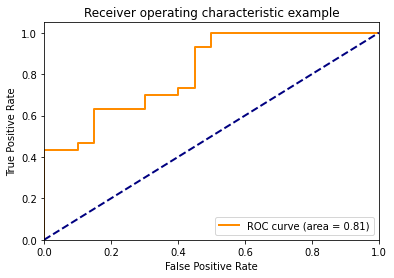

In [11]:
import matplotlib.pyplot as plt
from itertools import cycle
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [12]:
tp1, fp1, fn1 = 10, 5, 3
tp2, fp2, fn2 = 17, 7, 10
tp3, fp3, fn3 = 25, 2, 4 

In [13]:
from __future__ import print_function
def PR(tp, fp, fn):
    P = float(tp)/(tp + fp)
    R = float(tp)/(tp + fn)
    return (P, R)

(P1, R1) = PR(tp1, fp1, fn1)
(P2, R2) = PR(tp2, fp2, fn2)
(P3, R3) = PR(tp3, fp3, fn2)

print('(P1, R1) = (%.2f, %.2f)'%(P1, R1))
print('(P2, R2) = (%.2f, %.2f)'%(P2, R2))
print('(P3, R3) = (%.2f, %.2f)'%(P3, R3))


(P1, R1) = (0.67, 0.77)
(P2, R2) = (0.71, 0.63)
(P3, R3) = (0.93, 0.71)


In [14]:
total_tp = tp1 + tp2 + tp3
total_fp = fp1 + fp2 + fp3 
total_fn = fn1 + fn2 + fn3 
micro_ap = float(total_tp)/(total_tp + total_fp)
micro_ar = float(total_tp)/(total_tp + total_fn)
print('(micro_ap, micro_ar) = (%.2f, %.2f)' % (micro_ap, micro_ar))

(micro_ap, micro_ar) = (0.79, 0.75)


In [15]:
macro_ap = (P1 + P2 + P3)/3
macro_ar = (R1 + R2 + R3)/3
print('(micro_ap, micro_ar) = (%.2f, %.2f)' % (macro_ap, macro_ar))

(micro_ap, micro_ar) = (0.77, 0.70)
